# Owen's Custom Spending Tracker!

### What To Spend Lavishly On (Don't Think About Cutting Back On These):
1. Unique experiences and opportunities you wouldn't usually get - atm, probably vacations after COVID
2. Quality social time with friends (but not always stuff like "I was too lazy to cook today let's grab food")
3. Things that save significant time - especially in your youth, time >>>>
4. Things you use a LOT - buy the best that last a long time, don't be cheap - phones, laptops, beds, clothes, etc.
5. Investing in self, things that compound, such as education, health, maybe stocks if you understand shit
6. Giving to other people, but be genuine not just to feel better about yourself

### What To Ruthlessly Cut On (And Things That Take Up a LOT of Spending):
1. Rent/Housing - recurring, fat payments
2. Materialistic things you don't need/won't contribute to quality time with other people
3. Upgrading tech/models every year - don't fix what ain't broke for slight convenience improvements
4. Anything that have a lot of hidden costs/maintenance beyond price tag, e.g. cars (at least when ur single lol)
5. Unhealthy foods
6. Make sure you're not paying unnecessary taxes
7. Transportation - Lyft/Uber gah damn


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import re
import datetime
import random
from dateutil.relativedelta import relativedelta
from datetime import timedelta
%matplotlib inline

# Ideally, should track 1. Name, 2. Price, 3. Category, 4. Date, 5. Venmo/Card/Checking, 6. Recurring
abbv = {'f': 'Food', 'en': 'Entertainment', 'ho': 'Housing', 'tr' : 'Transportation', 'is': 'Insurance', 'he': 'Health',
        'ed': 'Education', 'c': 'Clothing', 'iv': 'Investment', 'g': 'Gift', 'v': 'Vacation', 's': 'Service',
        'd': 'Donation', 't': 'Tech', 'l': 'Living', 'o': 'Other'}

# Read to nice dataframe with datetime object
spending_df = pd.read_csv('og_spending_tracker.csv')

# # Add sample rows here
# tuition_row = {'Name':'Tuition', 'Price':7000, 'Category':'Education', 'Date':'Mar 22, 2021', 'From': 'Checking', 'Recurring': 'No'}
# rent_row = {'Name':'Rent', 'Price':1000, 'Category':'Housing', 'Date':'Feb 1, 2021', 'From': 'Checking', 'Recurring': 'No'}
# spending_df = spending_df.append(tuition_row, ignore_index=True)
# spending_df = spending_df.append(rent_row, ignore_index=True)

# Clean and Display
spending_df.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)
spending_df['Date'] = pd.to_datetime(spending_df['Date'].str.replace(',', ''))
spending_df = spending_df.sort_values('Date', ascending=False)
spending_df.head(10)
# spending_df.loc[spending_df['Category'] == 'Health']


,Name,Price,Category,Date,From,Recurring
0,Gig,9.00,Transportation,2021-06-30,Venmo,No
2,Subway,9.03,Food,2021-06-30,Credit,No
3,Rent,1219.77,Housing,2021-06-30,Credit,Yes
1,Memos,7.59,Food,2021-06-30,Credit,No
4,Gig,6.64,Transportation,2021-06-29,Debit,No
5,Chipotle,11.52,Food,2021-06-29,Credit,No
6,Sumo Sushi,16.84,Food,2021-06-29,Credit,No
7,Hawaii Jeep,87.35,Vacation,2021-06-28,Venmo,No
8,Shake Shack,11.19,Food,2021-06-28,Credit,No
9,Fob Poke Bar,16.53,Food,2021-06-28,Credit,No


## Here are some methods for calculating Spending on Name, Category, or Date
Edit column, specific entry in column, and excluding entries below

In [7]:
def how_much_did_i_spend(df, start_date, end_date, col='all', name='Total', exclude=[]):
    relevant_df = df.loc[df['Date'] >= start_date].loc[df['Date'] <= end_date]
    for c, val in exclude:
        relevant_df.drop(index=relevant_df[relevant_df[c] == val].index, inplace=True)
    try:
        if col != 'all':
            if col == 'Category' and len(name) <= 2:
                try:
                    name = abbv[name]
                except KeyError:
                    print('Not a valid category!')
            group_total = relevant_df.groupby(col).sum()
            total_spending = round(group_total.loc[name]['Price'], 2)
            if col == 'Recurring':
                name = 'Recurring'
        else:
            name='Total'
            total_spending = round(relevant_df['Price'].sum(), 2)
            print(total_spending)
    except KeyError:
        total_spending = 0.0
        
    print('I spent ${0} on {1} from {2} to {3} excluding {4}'
          .format(total_spending, name, start_date.strftime("%B %d %Y"), end_date.strftime("%B %d %Y"), exclude))
    return total_spending

In [8]:
# ENTER VALUES HERE
df = spending_df
start_date = datetime.datetime(2021, 1, 1)
end_date = datetime.datetime(2021, 7, 1)

# col defaults to 'all', name defaults to 'Total'
cat = 'Category'
col = 'all'
name = 'v'
exclude = [('Name', 'Tuition'), ('Category', 'Housing')]
# exclude.append(('Category', 'Vacation'))
# exclude = []

how_much_did_i_spend(df, start_date, end_date, col, name, exclude)

6307.89
I spent $6307.89 on Total from January 01 2021 to July 01 2021 excluding [('Name', 'Tuition'), ('Category', 'Housing')]


6307.89

## Here are some nice Visualizations

### Pie Chart of Spending Categories

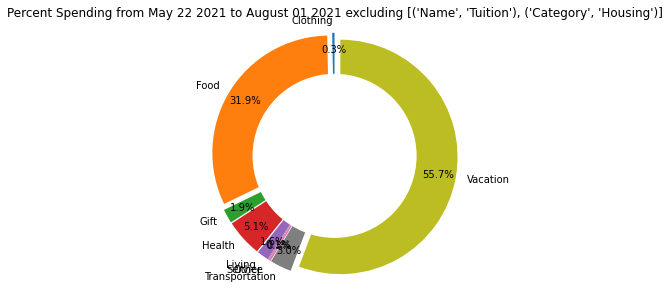

Percentages spent on each category:

Category
Vacation          55.74
Food              31.87
Health             5.13
Transportation     2.96
Gift               1.94
Living             1.64
Clothing           0.32
Service            0.31
Other              0.09
Name: Price, dtype: float64


In [9]:
start_date = datetime.datetime(2021, 5, 22)
end_date = datetime.datetime(2021, 8, 1)

def plot_categories(df, start_date, end_date, exclude=[]):
    relevant_df = df.loc[df['Date'] >= start_date].loc[df['Date'] <= end_date]
    for c, val in exclude:
        relevant_df.drop(index=relevant_df[relevant_df[c] == val].index, inplace=True)
    
    # Actual Logic
    category_totals = relevant_df.groupby('Category').sum()['Price']
    fig1, ax1 = plt.subplots()
    # explosion
    explode = [0.05] * len(category_totals)
    ax1.pie(category_totals, labels=category_totals.keys(), autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
    # draw circle
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')  
    plt.tight_layout()
    plt.title('Percent Spending from {0} to {1} excluding {2}'.format(start_date.strftime("%B %d %Y"), end_date.strftime("%B %d %Y"), exclude))
    plt.show()
    
    # Display percentages in table
    cat_percentages = np.round((category_totals / sum(category_totals))*100, 2).sort_values(ascending=False)
    print('Percentages spent on each category:')
    print()
    print(cat_percentages) 

plot_categories(df, start_date, end_date, exclude)

### Line Chart of Spending Over Categories Over Time

In [10]:
# Helper function
def calculate_y(df, start_date, delta, delta_value, category):
    y = []
    for i in range(delta_value):
        if delta == 'm':
            relevant_df_delta = df.loc[df['Date'] >= start_date + relativedelta(months=+i)] \
                                                .loc[df['Date'] < start_date + relativedelta(months=+(i+1))]
        elif delta == 'y':
            relevant_df_delta = df.loc[df['Date'] >= start_date + relativedelta(years=+i)] \
                                                .loc[df['Date'] < start_date + relativedelta(years=+(i+1))]
        elif delta == 'w':
            relevant_df_delta = df.loc[df['Date'] >= start_date + relativedelta(weeks=+i)] \
                                                .loc[df['Date'] < start_date + relativedelta(weeks=+(i+1))]
        if category == 'all':
            spending_delta = round(relevant_df_delta['Price'].sum(), 2)
        else:
            try:
                category_totals = relevant_df_delta.groupby('Category').sum().loc[category]['Price']
                spending_delta = round(category_totals, 2)
            except KeyError:
                spending_delta = 0
        y.append(spending_delta)
    return y

In [11]:
def spending_over_time(df, start_date, end_date, delta, category='all', exclude=[]):
    
    relevant_df = df.copy()
    for c, val in exclude:
        relevant_df.drop(index=relevant_df[relevant_df[c] == val].index, inplace=True)
        
    # time deltas
    delta_value = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month)
    delta_name = 'months'
    if len(category) <= 2:
        category = abbv[category]
    
    if delta == 'm':
        x = [start_date + relativedelta(months=+i) for i in range(delta_value)]
        y = calculate_y(relevant_df, start_date, delta, delta_value, category)
    elif delta == 'y':
        delta_value = (end_date.year - start_date.year)
        delta_name = 'years'
        x = [start_date + relativedelta(years=+i) for i in range(delta_value)]
        y = calculate_y(relevant_df, start_date, delta, delta_value, category)
    elif delta == 'w':
        monday1 = (start_date - timedelta(days=start_date.weekday()))
        monday2 = (end_date - timedelta(days=end_date.weekday()))
        delta_value = int((monday2 - monday1).days / 7)
        delta_name = 'weeks'
        x = [start_date + relativedelta(weeks=+i) for i in range(delta_value)]
        y = calculate_y(relevant_df, start_date, delta, delta_value, category)
    
    # Plotting line graph
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    
    plt.bar(x,y, width=10)
    
    # beautify the x-labels
    plt.gcf().autofmt_xdate()
    plt.title('Spending over {0} {1} from {2} to {3} in {4} excluding {5}'
              .format(delta_value, delta_name, start_date.strftime("%B %d %Y"), end_date.strftime("%B %d %Y"), 
                      category, exclude))
    plt.xlabel('Time ({0})'.format(delta_name))
    plt.ylabel('Spending (in USD $)')
    if category is not type(list):
        plt.legend([category])
    else:
        plt.legend(category)
        
    plt.show()
    return y

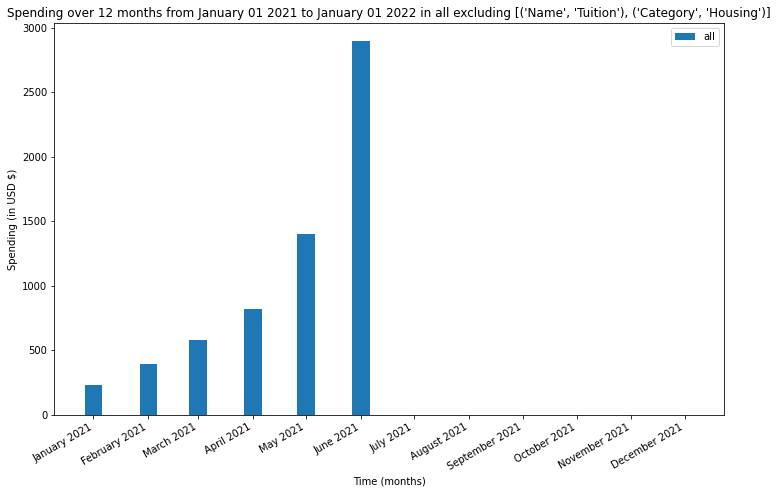

[226.38, 394.53, 576.8, 819.52, 1398.71, 2891.95, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [13]:
# ENTER VALUES HERE
df = spending_df
start_date = datetime.datetime(2021, 1, 1)
end_date = datetime.datetime(2022, 1, 1)
delta = 'm'
category = 'all'
exclude = [('Name', 'Tuition'), ('Category', 'Housing')]
# exclude.append(('Category', 'Vacation'))
# exclude.append(('Category', 'Tech'))
# exclude = []

spending_info = spending_over_time(df, start_date, end_date, delta, category, exclude)
spending_info

## Average spending per month/year, and what individual items you've spent most on

In [34]:
avg_spending_month = np.sum(spending_info) / np.count_nonzero(spending_info)
print('Average spending per month: {0}'.format(avg_spending_month))
print('Total spending this year: {0}'.format(np.sum(spending_info)))

Average spending per month: 690.2262499999999
Total spending this year: 5521.8099999999995


In [35]:
relevant_df = spending_df.copy()

# Comment out if don't want to exclude 
for c, val in exclude:
    relevant_df.drop(index=relevant_df[relevant_df[c] == val].index, inplace=True)
        
relevant_df.sort_values('Price', ascending=False).head()

,Name,Price,Category,Date,From,Recurring
323,Flight Tickets,258.40,Gift,2021-03-21,Credit,No
331,Weeknd Concert,210.40,Entertainment,2021-02-25,Venmo,No
300,Porter Robinson Concert,158.90,Entertainment,2021-05-06,Credit,No
291,Uniqlo,109.92,Clothing,2021-05-20,Credit,No
13,23andMe,108.95,Education,2021-08-27,Credit,No
